In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


INTERIM_PATH="data/interim/ENIGH"
RAW_PATH="data/raw/DATOS EDUCACION/ENCUESTA NACIONAL DE INGRESOS Y GASTOS EN LOS HOGARES/Extracted"
POP_2022=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"
POP_2020=f"{RAW_PATH}/2020/conjunto_de_datos_poblacion_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2020_ns.csv"
POP_2018=f"{RAW_PATH}/2018/conjunto_de_datos_poblacion_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2018_ns.csv"
POP_2016=f"{RAW_PATH}/2016/conjunto_de_datos_poblacion_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2016_ns.csv"


In [2]:
os.chdir('..')

## Alpha Graph 

The first graph we'll take a look at is a line chart where the horizontal axis will be the year in which the data was registered and the vertical axis is the percentage of literacy in the state/nation. First we grab the data from each period and we'll join the necessary columns only:

In [3]:
df_2016=pd.read_csv(POP_2016)
df_2018=pd.read_csv(POP_2018)
df_2020=pd.read_csv(POP_2020)
df_2022=pd.read_csv(POP_2022)


/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_53539/1531571683.py:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016=pd.read_csv(POP_2016)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_53539/1531571683.py:2: DtypeWarning: Columns (10,80,81,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018=pd.read_csv(POP_2018)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_53539/1531571683.py:3: DtypeWarning: Columns (10,11,12,13,14,15,16,17,82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020=pd.read_csv(POP_2020)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_53539/1531571683.py:4: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(POP_2022)


In [4]:
# We filter the columns we'll use:
columns=['folioviv','edad','alfabetism','sexo']
df_2016=df_2016[columns]
df_2018=df_2018[columns]
df_2020=df_2020[columns]
df_2022=df_2022[['folioviv','edad','alfabetism','entidad','sexo']]


# We add a state key for the datasets without it:
df_2016['entidad']=df_2016['folioviv']//10**8
df_2018['entidad']=df_2018['folioviv']//10**8
df_2020['entidad']=df_2020['folioviv']//10**8

# We add a year column to each dataset
df_2016['year']=2016
df_2018['year']=2018
df_2020['year']=2020
df_2022['year']=2022

# We get rid of registers of population less than 2 years old
df_2016=df_2016.dropna()
df_2018=df_2018[df_2018['alfabetism']!=' ']
df_2020=df_2020[df_2020['alfabetism']!=' ']
df_2022=df_2022[df_2022['alfabetism']!=' ']

# We format columns to be able to work consistently
df_2016['alfabetism']=df_2016['alfabetism'].astype('int')
df_2018['alfabetism']=df_2018['alfabetism'].astype('int')
df_2020['alfabetism']=df_2020['alfabetism'].astype('int')
df_2022['alfabetism']=df_2022['alfabetism'].astype('int')


Now we join the datasets into one dataframe to analyze:

In [5]:
df=pd.concat([df_2016,df_2018,df_2020,df_2022],ignore_index=True)



In [6]:
bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Define the edges of the bins
labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Define labels for the categories

df['año_nacimiento']=df['year']-df['edad']
df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)
df.drop(columns='año_nacimiento', inplace=True)

In [7]:
df.to_csv('ENIGH.csv')

In [6]:
total_state=df.groupby(['entidad','year'],as_index=False).value_counts()
total_state=total_state.groupby(['entidad','year'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})

literacy=df[['entidad','alfabetism','year']].groupby(['entidad','alfabetism','year'],as_index=False).value_counts()
literacy=literacy[literacy['alfabetism']==1] # Literate population
literacy.drop(columns='alfabetism', inplace=True)
literacy.reset_index(drop=True, inplace=True)


literacy=pd.merge(literacy,total_state, how='inner', on=['entidad','year'])
literacy['literacy_percent']=100*literacy['count']/literacy['total_registers']
literacy

,entidad,year,count,total_registers,literacy_percent
0,1,2016,7795,8763,88.953555
1,1,2018,7738,8560,90.397196
2,1,2020,8763,9617,91.119892
3,1,2022,8608,9424,91.341256
4,2,2016,10715,11852,90.406682
...,...,...,...,...,...
123,31,2022,8815,10082,87.433049
124,32,2016,5908,6631,89.096667
125,32,2018,6721,7534,89.208920
126,32,2020,7533,8462,89.021508


In [63]:
states=[
    # Top 3 literate states:
    9,3,2,
    # Top 3 illiterate states:
    12,7,20,
    # Sonora
    26
]
graph_df=literacy[literacy['entidad'].isin(states)]
graph_df.drop(columns=['count','total_registers'], inplace=True)


/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_35893/2181197485.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df.drop(columns=['count','total_registers'], inplace=True)


In [ ]:
entidades=pd.read_csv("data/dictionaries/entidad.csv",encoding='Windows-1252')
entidades.info()

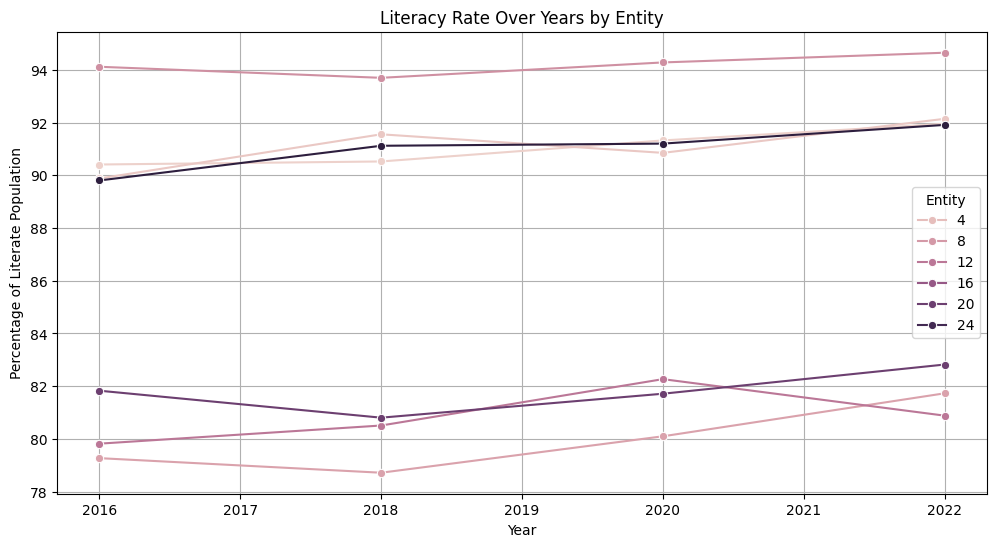

In [64]:
data=graph_df
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='literacy_percent', hue='entidad', marker='o')

# Customize plot
plt.title('Literacy Rate Over Years by Entity')
plt.xlabel('Year')
plt.ylabel('Percentage of Literate Population')
plt.legend(title='Entity')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Define the edges of the bins
labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Define labels for the categories

df['año_nacimiento']=df['year']-df['edad']
df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)
df.drop(columns='año_nacimiento', inplace=True)

In [13]:
# Sonora generational analysis
total_state=df[df['entidad']==26].groupby(['generacion','year'],as_index=False).value_counts()
total_state=total_state.groupby(['generacion','year'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})

literacy=df[df['entidad']==26][['alfabetism','year','generacion']].groupby(['alfabetism','year','generacion'],as_index=False).value_counts()
literacy=literacy[literacy['alfabetism']==1] # Literate population
literacy.drop(columns='alfabetism', inplace=True)
literacy.reset_index(drop=True, inplace=True)

literacy=pd.merge(literacy,total_state, how='inner', on=['generacion','year'])
literacy['literacy_percent']=100*literacy['count']/literacy['total_registers']

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_37161/3175435158.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_state=df[df['entidad']==26].groupby(['generacion','year'],as_index=False).value_counts()
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_37161/3175435158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_state=total_state.groupby(['generacion','year'],as_index=False)['count'].sum()
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_37161/3175435158.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

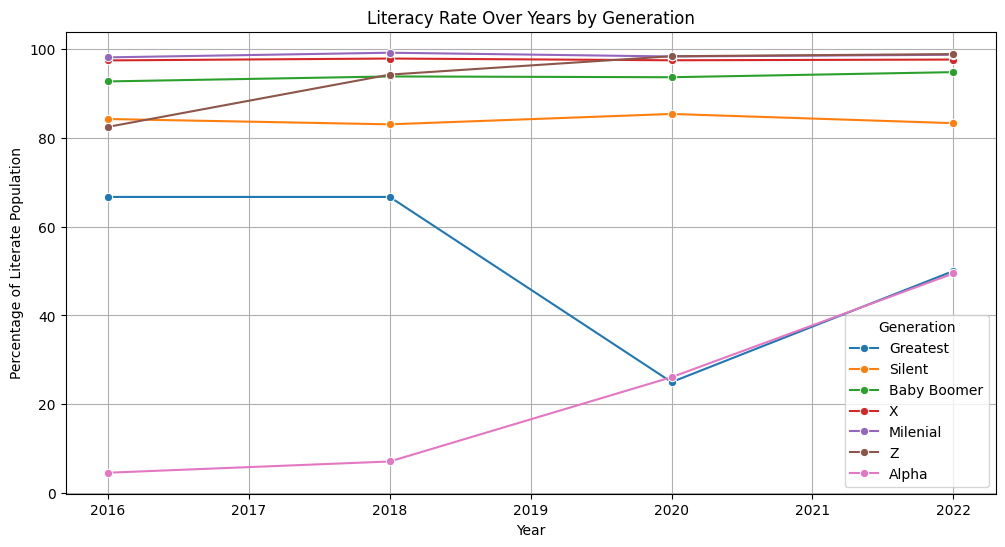

In [15]:
graph_df=literacy
data=graph_df
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='literacy_percent', hue='generacion', marker='o')

# Customize plot
plt.title('Literacy Rate Over Years by Generation in Sonora')
plt.xlabel('Year')
plt.ylabel('Percentage of Literate Population')
plt.legend(title='Generation')
plt.grid(True)

# Show the plot
plt.show()

# Beta Graph 

In [23]:
total_state=df[df['edad']>=15]
total_state=df.groupby(['entidad','year'],as_index=False).value_counts()
total_state=total_state.groupby(['entidad','year'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})

literacy=df[df['edad']>=15]
literacy=literacy[['entidad','alfabetism','year']].groupby(['entidad','alfabetism','year'],as_index=False).value_counts()
literacy=literacy[literacy['alfabetism']==1] # Literate population


literacy.drop(columns='alfabetism', inplace=True)
literacy.reset_index(drop=True, inplace=True)


literacy=pd.merge(literacy,total_state, how='inner', on=['entidad','year'])
literacy['literacy_percent']=100*literacy['count']/literacy['total_registers']


In [24]:
literacy

,entidad,year,count,total_registers,literacy_percent
0,1,2016,6213,8763,70.900377
1,1,2018,6277,8560,73.329439
2,1,2020,7207,9617,74.940210
3,1,2022,6930,9424,73.535654
4,2,2016,8601,11852,72.570030
...,...,...,...,...,...
123,31,2022,7360,10082,73.001389
124,32,2016,4701,6631,70.894284
125,32,2018,5428,7534,72.046722
126,32,2020,6205,8462,73.327818


In [25]:
entidades=pd.read_csv("data/dictionaries/entidad.csv",encoding='Windows-1252')
entidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entidad      32 non-null     int64 
 1   descripcion  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 644.0+ bytes


In [26]:
graph_df=literacy[literacy['year']==2020]
graph_df=pd.merge(graph_df,entidades,how='inner',on='entidad')
graph_df=graph_df.rename(columns={'descripcion':'entidad_federativa'})
graph_df.drop(columns='entidad',inplace=True)
graph_df['illiteracy_percent']=(100-graph_df['literacy_percent'])
graph_df.head()

,year,count,total_registers,literacy_percent,entidad_federativa,illiteracy_percent
0,2020,7207,9617,74.940210,Aguascalientes,25.059790
1,2020,10108,13387,75.506088,Baja California,24.493912
2,2020,6501,8534,76.177642,Baja California Sur,23.822358
3,2020,5454,7454,73.168768,Campeche,26.831232
4,2020,9975,13119,76.034759,Coahuila de Zaragoza,23.965241


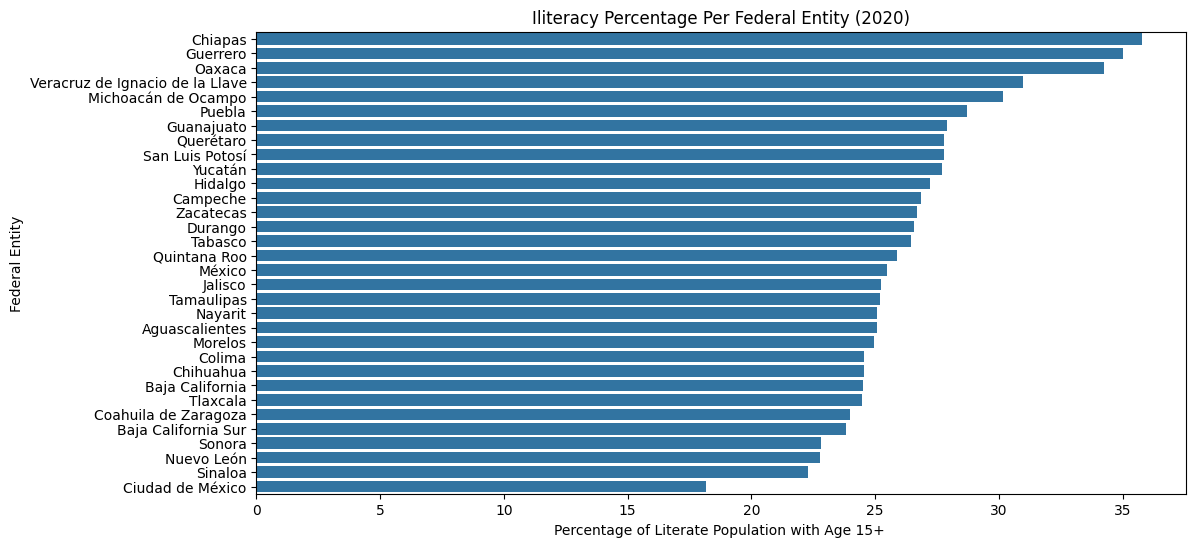

In [27]:
data=graph_df.sort_values('illiteracy_percent',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=data, y='entidad_federativa', x='illiteracy_percent',orient="h")

plt.title('Iliteracy Percentage Per Federal Entity (2020)')
plt.ylabel('Federal Entity')
plt.xlabel('Percentage of Literate Population with Age 15+ ')

plt.show()

# Gamma Graph

This graph is a column histogram in order to show the literacy distribution spread over the generations for each year. 

In [19]:
# Sonora generational analysis
total_state=df[df['entidad']==26].groupby(['generacion','year'],as_index=False).value_counts()
total_state=total_state.groupby(['generacion','year'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})

literacy=df[df['entidad']==26][['alfabetism','year','generacion']].groupby(['alfabetism','year','generacion'],as_index=False).value_counts()
literacy=literacy[literacy['alfabetism']==1] # Literate population
literacy.drop(columns='alfabetism', inplace=True)
literacy.reset_index(drop=True, inplace=True)

literacy=pd.merge(literacy,total_state, how='inner', on=['generacion','year'])
literacy['literacy_percent']=100*literacy['count']/literacy['total_registers']

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_37161/1285086880.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_state=df[df['entidad']==26].groupby(['generacion','year'],as_index=False).value_counts()
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_37161/1285086880.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_state=total_state.groupby(['generacion','year'],as_index=False)['count'].sum()
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_37161/1285086880.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

In [20]:
literacy

,year,generacion,count,total_registers,literacy_percent
0,2016,Greatest,4,6,66.666667
1,2016,Silent,309,367,84.196185
2,2016,Baby Boomer,1072,1157,92.653414
3,2016,X,1637,1681,97.382510
4,2016,Milenial,1723,1757,98.064883
5,2016,Z,1932,2344,82.423208
6,2016,Alpha,6,130,4.615385
7,2018,Greatest,2,3,66.666667
8,2018,Silent,249,300,83.000000
9,2018,Baby Boomer,1024,1092,93.772894


In [21]:
df

,folioviv,edad,alfabetism,sexo,entidad,year,generacion
0,100068001,71,2,2,1,2016,Silent
1,100068002,64,1,1,1,2016,Baby Boomer
2,100068002,61,1,2,1,2016,Baby Boomer
3,100068002,24,1,2,1,2016,Milenial
4,100068003,82,1,1,1,2016,Silent
...,...,...,...,...,...,...,...
1103135,3260797909,5,2,1,32,2022,Alpha
1103136,3260797910,63,1,1,32,2022,Baby Boomer
1103137,3260797910,59,1,2,32,2022,Baby Boomer
1103138,3260797912,29,1,1,32,2022,Milenial


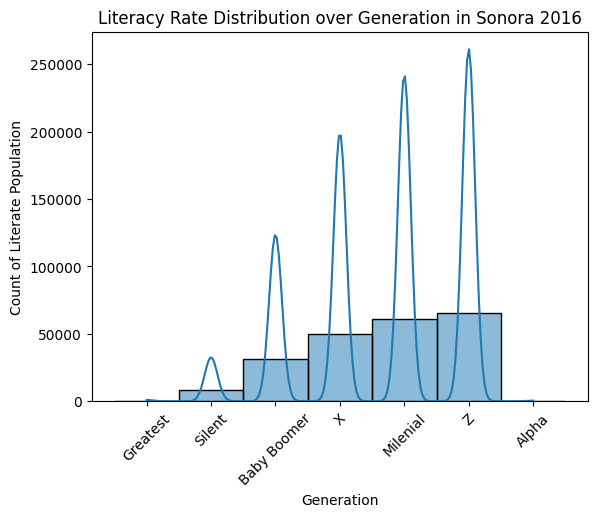

In [49]:
data=df[(df['year']==2016)&(df['alfabetism']==1)]
sns.histplot(data=data, x='generacion', bins=5, kde=True)

plt.title('Literacy Rate Distribution over Generation in Sonora 2016')
plt.xlabel('Generation')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

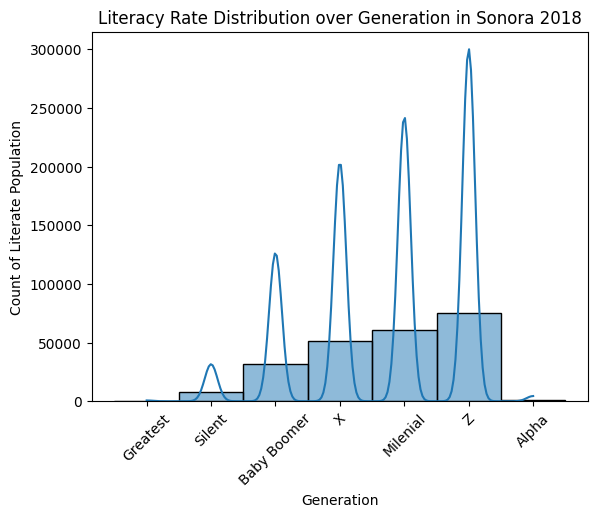

In [50]:
data=df[(df['year']==2018)&(df['alfabetism']==1)]
sns.histplot(data=data, x='generacion', bins=5, kde=True)

plt.title('Literacy Rate Distribution over Generation in Sonora 2018')
plt.xlabel('Generation')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

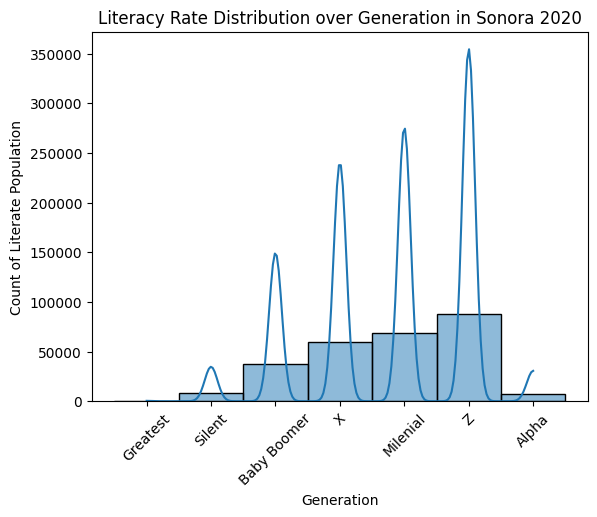

In [51]:
data=df[(df['year']==2020)&(df['alfabetism']==1)]
sns.histplot(data=data, x='generacion', bins=5, kde=True)

plt.title('Literacy Rate Distribution over Generation in Sonora 2020')
plt.xlabel('Generation')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

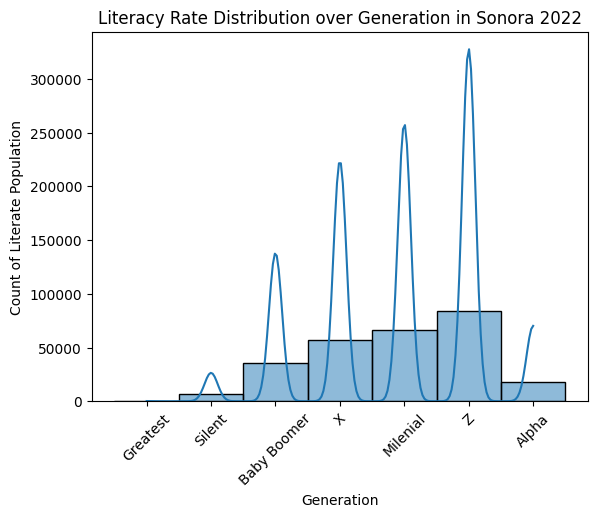

In [52]:
data=df[(df['year']==2022)&(df['alfabetism']==1)]
sns.histplot(data=data, x='generacion', bins=5, kde=True)

plt.title('Literacy Rate Distribution over Generation in Sonora 2022')
plt.xlabel('Generation')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

In [42]:
bins = range(0, 101, 10)  # Bins for age groups (0-9, 10-19, 20-29, etc.)
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Labels for the bins
df['age_group'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

In [51]:
df['Gender'] = df['sexo'].apply(lambda x: 'Female' if x == 2 else ('Male' if x == 1 else None))

In [52]:
df

,folioviv,edad,alfabetism,sexo,entidad,year,generacion,age_group,Gender
0,100068001,71,2,2,1,2016,Silent,70-79,Female
1,100068002,64,1,1,1,2016,Baby Boomer,60-69,Male
2,100068002,61,1,2,1,2016,Baby Boomer,60-69,Female
3,100068002,24,1,2,1,2016,Milenial,20-29,Female
4,100068003,82,1,1,1,2016,Silent,80-89,Male
...,...,...,...,...,...,...,...,...,...
1103135,3260797909,5,2,1,32,2022,Alpha,0-9,Male
1103136,3260797910,63,1,1,32,2022,Baby Boomer,60-69,Male
1103137,3260797910,59,1,2,32,2022,Baby Boomer,50-59,Female
1103138,3260797912,29,1,1,32,2022,Milenial,20-29,Male


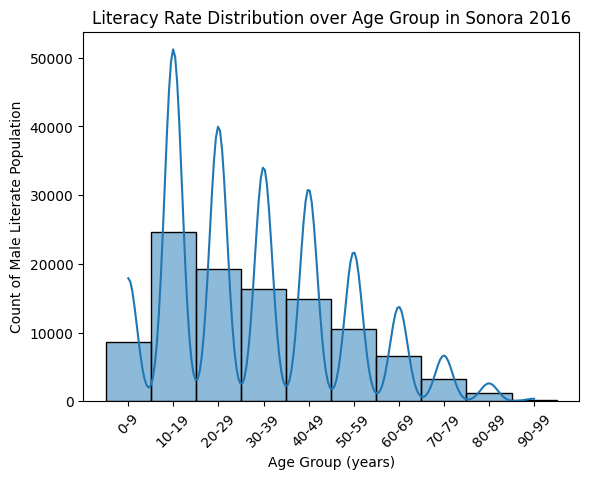

In [53]:
data=df[(df['year']==2016)&(df['sexo']==1)&(df['alfabetism']==1)]
sns.histplot(data=data, x='age_group', bins=100, kde=True)

plt.title('Literacy Rate Distribution over Age Group in Sonora 2016')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Male Literate Population')
plt.xticks(rotation=45)
plt.show()

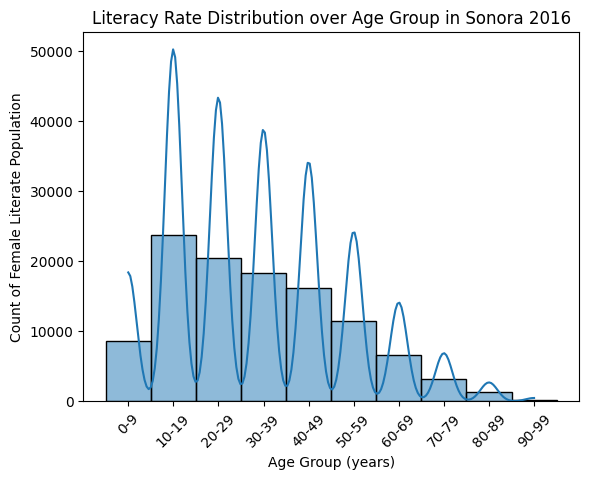

In [54]:
data=df[(df['year']==2016)&(df['sexo']==2)&(df['alfabetism']==1)]
sns.histplot(data=data, x='age_group', bins=100, kde=True)

plt.title('Literacy Rate Distribution over Age Group in Sonora 2016')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Female Literate Population')
plt.xticks(rotation=45)
plt.show()

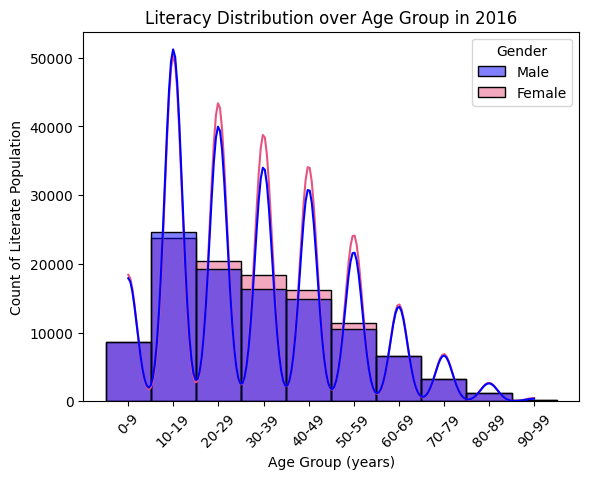

In [70]:
data=df[(df['year']==2016)&(df['alfabetism']==1)]
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Literacy Distribution over Age Group in 2016')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

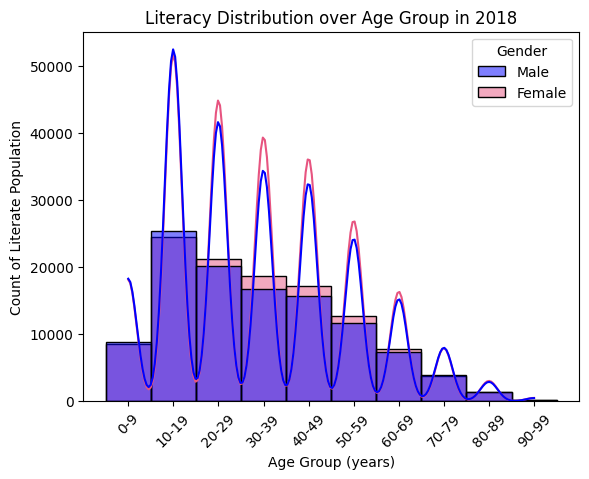

In [71]:
data=df[(df['year']==2018)&(df['alfabetism']==1)]
data=data.sort_values('Gender',ascending=False)

sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Literacy Distribution over Age Group in 2018')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

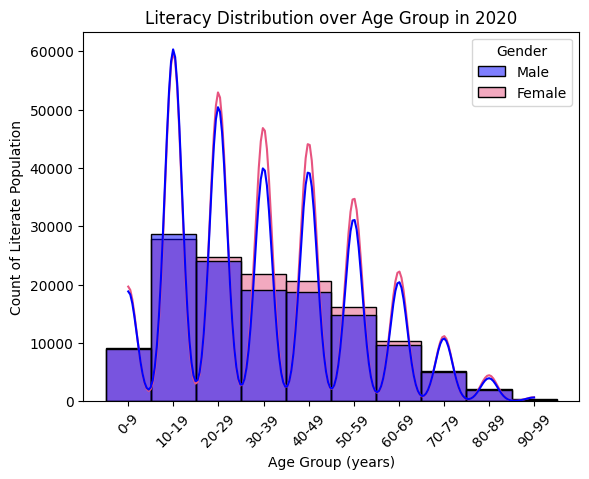

In [72]:
data=df[(df['year']==2020)&(df['alfabetism']==1)]
data=data.sort_values('Gender',ascending=False)
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Literacy Distribution over Age Group in 2020')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

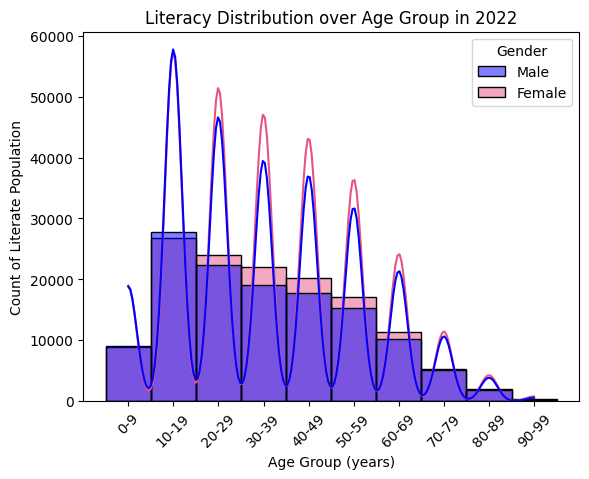

In [73]:
data=df[(df['year']==2022)&(df['alfabetism']==1)]
data=data.sort_values('Gender',ascending=False)
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Literacy Distribution over Age Group in 2022')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Literate Population')
plt.xticks(rotation=45)
plt.show()

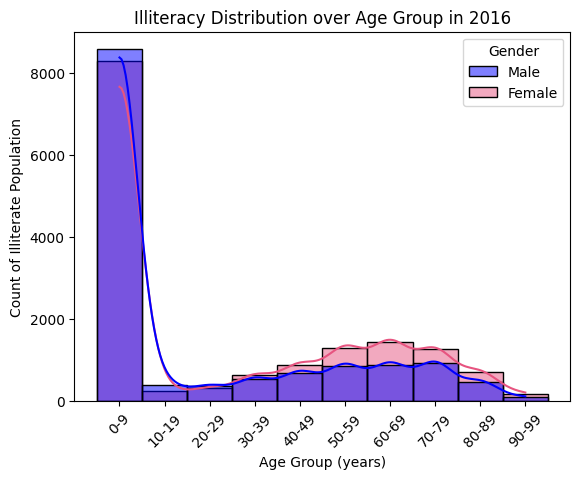

In [75]:
data=df[(df['year']==2016)&(df['alfabetism']==2)]
data=data.sort_values('Gender',ascending=False)
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Illiteracy Distribution over Age Group in 2016')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Illiterate Population')
plt.xticks(rotation=45)
plt.show()

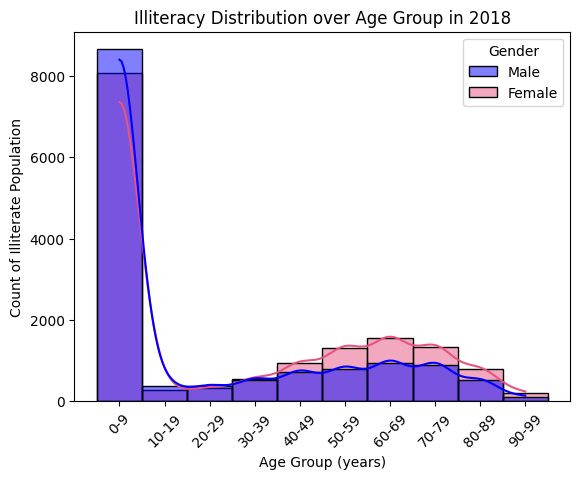

In [77]:
data=df[(df['year']==2018)&(df['alfabetism']==2)]
data=data.sort_values('Gender',ascending=False)
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Illiteracy Distribution over Age Group in 2018')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Illiterate Population')
plt.xticks(rotation=45)
plt.show()

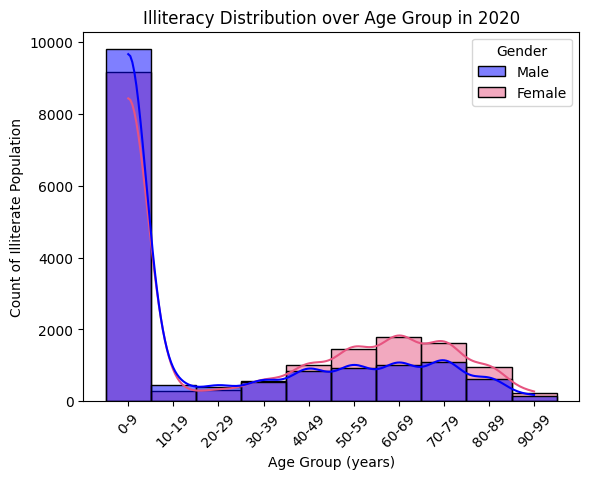

In [79]:
data=df[(df['year']==2020)&(df['alfabetism']==2)]
data=data.sort_values('Gender',ascending=False)
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Illiteracy Distribution over Age Group in 2020')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Illiterate Population')
plt.xticks(rotation=45)
plt.show()

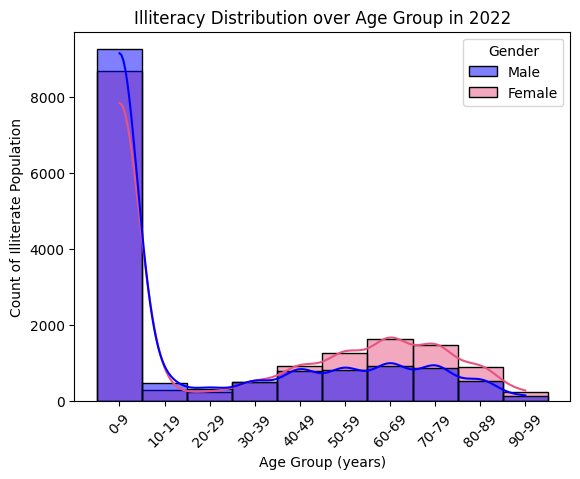

In [80]:
data=df[(df['year']==2022)&(df['alfabetism']==2)]
data=data.sort_values('Gender',ascending=False)
sns.histplot(data=data, x='age_group',hue='Gender', bins=100, kde=True,palette={'Male': '#0000FF', 'Female': '#E75480'})

plt.title('Illiteracy Distribution over Age Group in 2022')
plt.xlabel('Age Group (years)')
plt.ylabel('Count of Illiterate Population')
plt.xticks(rotation=45)
plt.show()